 # Website Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset from csv file

df = pd.read_csv("../DATA/website_data_analysis.csv")
df.head()

,website,visits,bounce_rate,conversion_rate,days_of_week,unique_visitors,referral_source,revenue
0,boss.com,5000,20,3.0,Monday,3000,Google,1000
1,python.com,3500,25,2.0,Tuesday,2800,Facebook,800
2,wild.com,6000,15,4.0,Wednesday,3900,Twitter,1200
3,cat.com,4500,30,1.5,Thursday,3500,Instagram,700
4,kit.com,5500,18,3.5,Friday,3700,Yahoo,1000


In [3]:
# Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website          21 non-null     object 
 1   visits           21 non-null     int64  
 2   bounce_rate      21 non-null     int64  
 3   conversion_rate  21 non-null     float64
 4   days_of_week     21 non-null     object 
 5   unique_visitors  21 non-null     int64  
 6   referral_source  21 non-null     object 
 7   revenue          21 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.4+ KB


In [4]:
df['website'].value_counts()

website
boss.com              2
wild.com              2
CraftyCorner.com      1
Childcare.net         1
Garden.com            1
Love.net              1
FinFit.net            1
MusicMaven.com        1
MindMelders.net       1
HealthHQ.net          1
CodeCrushers.org      1
python.com            1
TravelCove.net        1
FoodieFrenzy.com      1
SmartGardeners.net    1
ScribeMind.com        1
kit.com               1
cat.com               1
GoldSales.com         1
Name: count, dtype: int64

In [5]:
# Group by dataset by website

by_website = df.groupby(by='website')['visits'].mean()
by_website

website
Childcare.net         1400.0
CodeCrushers.org      2900.0
CraftyCorner.com      3000.0
FinFit.net            3400.0
FoodieFrenzy.com      3200.0
Garden.com            1300.0
GoldSales.com         1200.0
HealthHQ.net          2500.0
Love.net              3400.0
MindMelders.net       2600.0
MusicMaven.com        3100.0
ScribeMind.com        3200.0
SmartGardeners.net    2700.0
TravelCove.net        2800.0
boss.com              4500.0
cat.com               4500.0
kit.com               5500.0
python.com            3500.0
wild.com              5050.5
Name: visits, dtype: float64

In [6]:
# Add number of visits per unique visitor

df['views_per_visitor'] = df['visits']/df['unique_visitors']
df.head()

,website,visits,bounce_rate,conversion_rate,days_of_week,unique_visitors,referral_source,revenue,views_per_visitor
0,boss.com,5000,20,3.0,Monday,3000,Google,1000,1.666667
1,python.com,3500,25,2.0,Tuesday,2800,Facebook,800,1.250000
2,wild.com,6000,15,4.0,Wednesday,3900,Twitter,1200,1.538462
3,cat.com,4500,30,1.5,Thursday,3500,Instagram,700,1.285714
4,kit.com,5500,18,3.5,Friday,3700,Yahoo,1000,1.486486


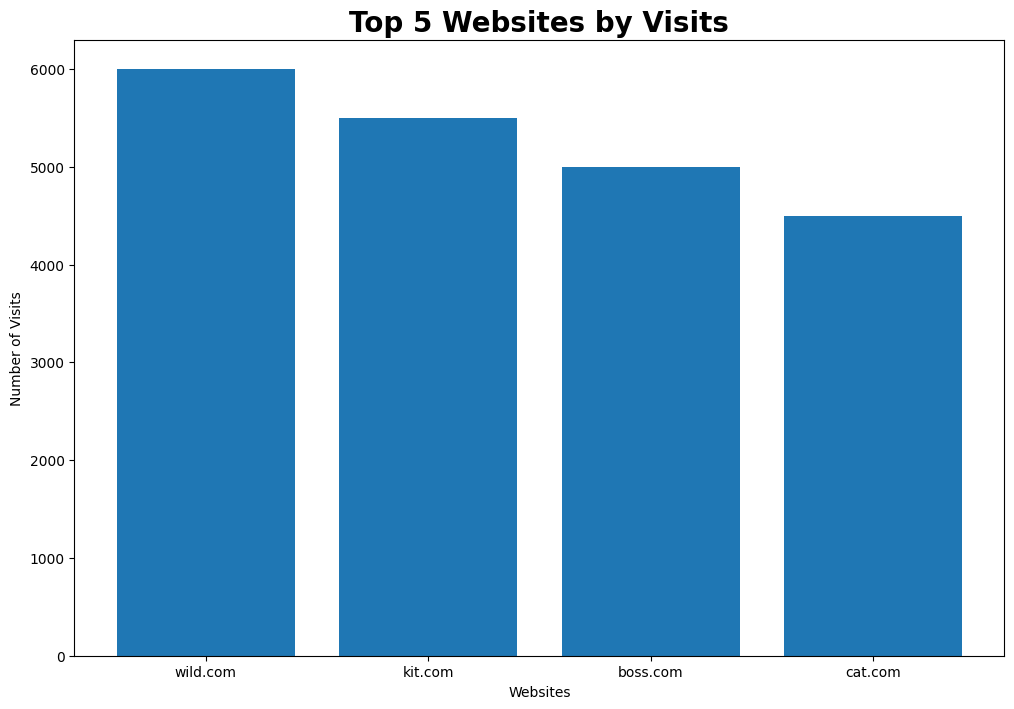

In [7]:
# Barplot of page views of top 5 websites

# Sort by visits
website_top_visit = df.sort_values(by='visits', ascending=False).head()

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(x=website_top_visit['website'],
       height=website_top_visit['visits'])
ax.set(ylabel='Number of Visits',xlabel="Websites")
plt.title(label="Top 5 Websites by Visits",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [8]:
# Group data by day of week

day_avg_bounce_rate = df.groupby(by='days_of_week')['bounce_rate'].mean()
day_avg_bounce_rate

days_of_week
Friday       15.666667
Monday       21.333333
Saturday     16.000000
Sunday       18.333333
Thursday     20.666667
Tuesday      18.000000
Wednesday    13.666667
Name: bounce_rate, dtype: float64

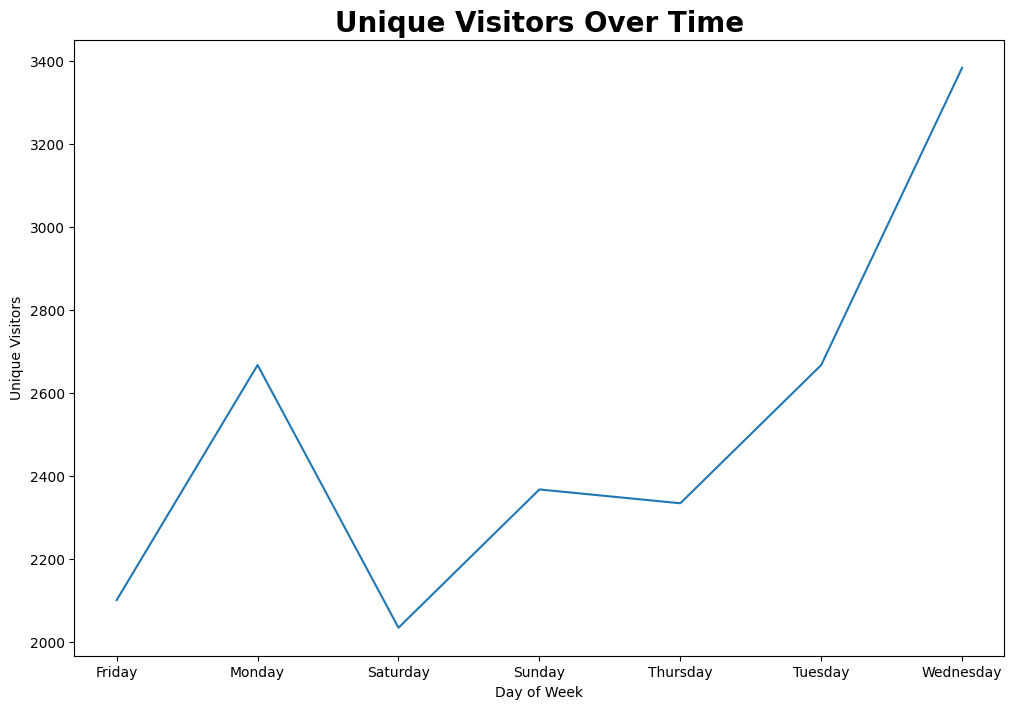

In [9]:
# Line plot of unique visitors over time
df_grouped_day = df.groupby(by='days_of_week')['unique_visitors'].mean()
df_grouped_day = df_grouped_day.to_frame()
# df_grouped_day

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df_grouped_day,x=df_grouped_day.index,
             y='unique_visitors',ax=ax)
ax.set(xlabel="Day of Week",ylabel="Unique Visitors")
plt.title(label="Unique Visitors Over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [10]:
# Group by day of week and referral source
grouped_df = df.groupby(by=['days_of_week','referral_source'])[['visits','revenue']].mean()
grouped_df

visits  revenue
days_of_week referral_source                 
Friday       Instagram        2100.0   1450.0
             Yahoo            5500.0   1000.0
Monday       Google           5000.0   1000.0
             Instagram        2600.0    700.0
             Reddit           3200.0    900.0
Saturday     Reddit           1400.0    700.0
             Twitter          4000.0   1500.0
             Yahoo            3000.0    600.0
Sunday       Google           1200.0   3100.0
             Instagram        4101.0    900.0
             Twitter          2500.0    800.0
Thursday     Instagram        4500.0    700.0
             Twitter          3100.0   1750.0
Tuesday      Facebook         3500.0    800.0
             Google           2700.0   1900.0
             Reddit           3100.0    600.0
Wednesday    Facebook         3200.0    700.0
             Twitter          6000.0   1200.0
             Yahoo            3400.0   1100.0

In [11]:
# Compute revenue rate 
df['revenue_rate'] = (df['revenue']/(sum(df['revenue'])))*100

# Group revenue rate by referral source
by_referral_source = df.groupby(by='referral_source')['revenue_rate'].sum()
by_referral_source

referral_source
Facebook      6.097561
Google       24.390244
Instagram    21.138211
Reddit        8.943089
Twitter      28.455285
Yahoo        10.975610
Name: revenue_rate, dtype: float64

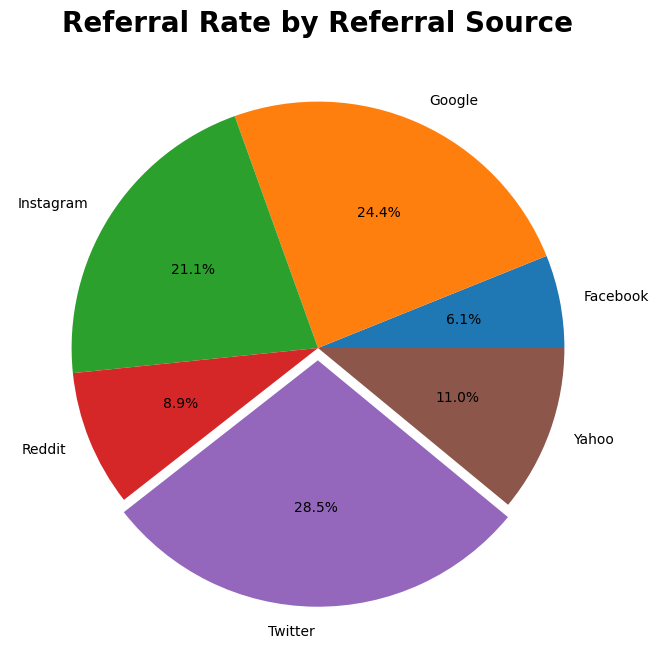

In [12]:
# Pie chart of revenue rate by referral source

fig,ax = plt.subplots(figsize=(12,8))
ax.pie(x=by_referral_source, labels=by_referral_source.index,
       autopct='%.1f%%',explode=(0,0,0,0,0.05,0) )
plt.title(label="Referral Rate by Referral Source",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()